In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

# Experimentation with different models and assorted qq plots, scatters, and histograms

If you don't want to look through all of this, we essentially just added variables to the model and only kept them if the adjusted R^2 improved and the coefficient p-values stayed in an acceptable range. The final model was not developed in this notebook.



In [13]:
df_master = pd.read_csv("df_master.csv")

In [15]:
df_master.head(2)

,Unnamed: 0,zipcode,median_income,mean_income,population,City_zill,State_zill,Metro_zill,CountyName_zill,SizeRank_zill,...,2018-05_zill,2018-06_zill,2018-07_zill,2018-08_zill,2018-09_zill,2018-10_zill,2018-11_zill,2018-12_zill,2019-01_zill,restaurant_count
0,0,10001,71244.6100,123112.7764,17678,New York,NY,New York-Newark-Jersey City,New York County,1297.0,...,3470.0,3387.5,3387.5,3370.0,3348.0,3400.0,3370.0,3348.0,3400.0,488.0
1,1,10002,30843.9574,46258.6118,70878,New York,NY,New York-Newark-Jersey City,New York County,9.0,...,3250.0,3195.0,3125.0,3200.0,3199.0,3112.5,3112.5,3125.0,3050.0,509.0


In [118]:
model4 = smf.ols(formula='median_income ~ restaurant_count*population+population + restaurant_count', 
                 data=df_master).fit()

In [119]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           2.41e-10
Time:                        10:01:40   Log-Likelihood:                -2103.1
No. Observations:                 184   AIC:                             4214.
Df Residuals:                     180   BIC:                             4227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    7.424e+04   4324.058     17.169      0.000    6.57e+04    8.28e+04
restaurant_count               30.2310     25.857      1.169      0.244     -20.791      81.252
population                     -0.5515      0.111     -4.985      0.000      -0.770      -0.333
restaurant_count:population     0.0005      0.001      0.897      0.371      -0.001       0.002
==============================================================================
Omnibus:                        6.803   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.046
Skew:                           0.344   Prob(JB):                       0.0295
Kurtosis:                       3.668   Cond. No.                     2.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


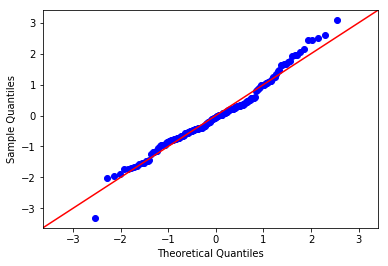

In [98]:
residual4 = model4.resid
fig = sm.graphics.qqplot(residual4, dist=stats.norm, line='45', fit=True)
fig.show()

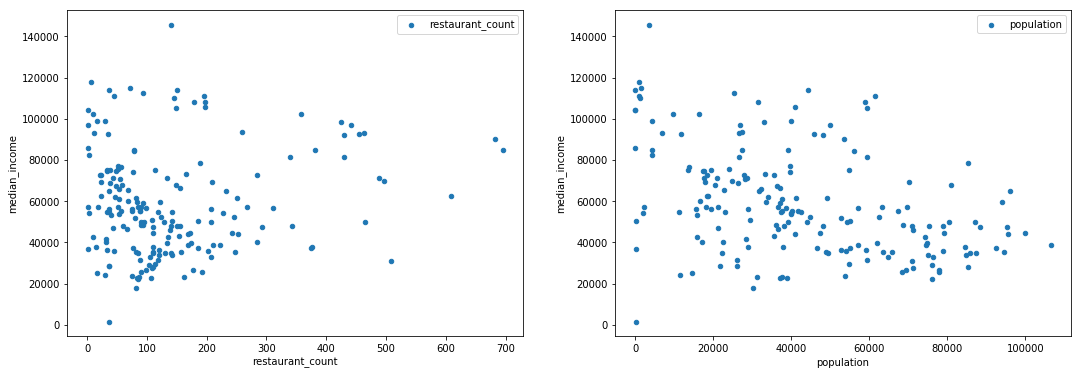

In [105]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['restaurant_count', 'population']):
    df_master.plot(kind='scatter', x=dollars, y='median_income', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


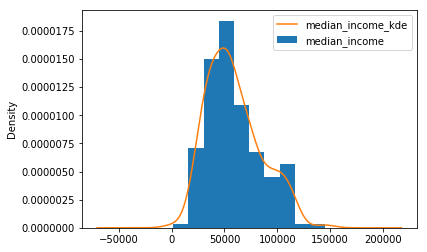

In [106]:
df_master['median_income'].plot.hist(normed=True, label = 'median_income')
df_master['median_income'].plot.kde(label ='median_income_kde')
plt.legend()
plt.show()

In [126]:
model5 = smf.ols(formula='median_income ~ restaurant_count*population+population + restaurant_count', 
                 data=df_master).fit()

In [127]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           2.41e-10
Time:                        10:58:15   Log-Likelihood:                -2103.1
No. Observations:                 184   AIC:                             4214.
Df Residuals:                     180   BIC:                             4227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    7.424e+04   4324.058     17.169      0.000    6.57e+04    8.28e+04
restaurant_count               30.2310     25.857      1.169      0.244     -20.791      81.252
population                     -0.5515      0.111     -4.985      0.000      -0.770      -0.333
restaurant_count:population     0.0005      0.001      0.897      0.371      -0.001       0.002
==============================================================================
Omnibus:                        6.803   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.046
Skew:                           0.344   Prob(JB):                       0.0295
Kurtosis:                       3.668   Cond. No.                     2.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
df_master94 = pd.read_csv("df_master94.csv")

In [143]:
df_master94.rename(columns={'2019-01_zill':'median_rent'},inplace=True)

In [144]:
df_master94.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population',
       'CountyName_zill', 'median_rent', 'restaurant_count',
       'recycling_bin_count', 'num_subway_entrances', 'subway_bracket'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


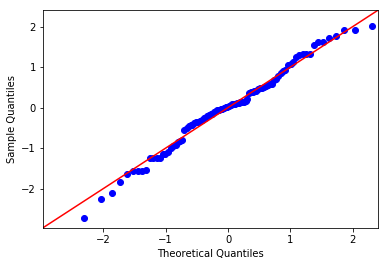

In [173]:
residual6 = model6.resid
fig = sm.graphics.qqplot(residual6, dist=stats.norm, line='45', fit=True)
fig.show()

In [192]:
model6 = smf.ols(formula='median_income ~ C(subway_bracket)+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.87e-11
Time:                        11:32:47   Log-Likelihood:                -1057.4
No. Observations:                  94   AIC:                             2133.
Df Residuals:                      85   BIC:                             2156.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.271e+04   1.19e+04      1.905      0.060    -989.749    4.64e+04
C(subway_bracket)[T.(6, 72]]    -372.6169   5773.464     -0.065      0.949   -1.19e+04    1.11e+04
C(subway_bracket)[T.0]          1.068e+04   6346.911      1.682      0.096   -1942.151    2.33e+04
median_rent                       20.4277      3.257      6.272      0.000      13.952      26.904
recycling_bin_count             -976.8055   1618.640     -0.603      0.548   -4195.096    2241.485
population                        -0.2233      0.168     -1.327      0.188      -0.558       0.111
recycling_bin_count:population     0.0010      0.032      0.030      0.976      -0.063       0.065
restaurant_count                 -31.9594     28.793     -1.110      0.270     -89.208      25.289
restaurant_count:population        0.0005      0.001      0.639      0.524      -0.001       0.002
==============================================================================
Omnibus:                        0.762   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.785
Skew:                          -0.208   Prob(JB):                        0.675
Kurtosis:                       2.834   Cond. No.                     7.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.87e-11
Time:                        11:08:07   Log-Likelihood:                -1057.4
No. Observations:                  94   AIC:                             2133.
Df Residuals:                      85   BIC:                             2156.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.271e+04   1.19e+04      1.905      0.060    -989.749    4.64e+04
C(subway_bracket)[T.(6, 72]]    -372.6169   5773.464     -0.065      0.949   -1.19e+04    1.11e+04
C(subway_bracket)[T.0]          1.068e+04   6346.911      1.682      0.096   -1942.151    2.33e+04
median_rent                       20.4277      3.257      6.272      0.000      13.952      26.904
recycling_bin_count             -976.8055   1618.640     -0.603      0.548   -4195.096    2241.485
recycling_bin_count:population     0.0010      0.032      0.030      0.976      -0.063       0.065
restaurant_count                 -31.9594     28.793     -1.110      0.270     -89.208      25.289
population                        -0.2233      0.168     -1.327      0.188      -0.558       0.111
restaurant_count:population        0.0005      0.001      0.639      0.524      -0.001       0.002
==============================================================================
Omnibus:                        0.762   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.785
Skew:                          -0.208   Prob(JB):                        0.675
Kurtosis:                       2.834   Cond. No.                     7.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
model7 = smf.ols(formula='median_income~median_rent', 
                 data=df_master94).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     69.97
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.24e-13
Time:                        11:14:43   Log-Likelihood:                -1065.2
No. Observations:                  94   AIC:                             2134.
Df Residuals:                      92   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.172e+04   6708.390      1.747      0.084   -1604.564     2.5e+04
median_rent    19.8231      2.370      8.365      0.000      15.117      24.530
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.236
Skew:                          -0.096   Prob(JB):                        0.889
Kurtosis:                       2.848   Cond. No.                     9.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
model8 = smf.ols(formula='median_rent ~ recycling_bin_count*population', 
                 data=df_master94).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            median_rent   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     11.76
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.42e-06
Time:                        11:12:55   Log-Likelihood:                -756.04
No. Observations:                  94   AIC:                             1520.
Df Residuals:                      90   BIC:                             1530.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2889.7624    233.614     12.370      0.000    2425.648    3353.877
recycling_bin_count              176.9867     58.882      3.006      0.003      60.007     293.967
population                        -0.0090      0.004     -2.021      0.046      -0.018      -0.000
recycling_bin_count:population    -0.0025      0.001     -2.133      0.036      -0.005      -0.000
==============================================================================
Omnibus:                        5.797   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.135
Skew:                           0.498   Prob(JB):                       0.0767
Kurtosis:                       3.564   Cond. No.                     6.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
residual94 = model94.resid
fig = sm.graphics.qqplot(residual94, dist=stats.norm, line='45', fit=True)
fig.show()

NameError: name 'model94' is not defined

In [178]:
df_master94.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population',
       'CountyName_zill', 'median_rent', 'restaurant_count',
       'recycling_bin_count', 'num_subway_entrances', 'subway_bracket'],
      dtype='object')

In [186]:
df_master94['rent_over_income'] = df_master94['median_rent']*12/df_master94['median_income']

Unnamed: 0              0
zipcode                 0
median_income           0
population              0
CountyName_zill         0
median_rent             0
restaurant_count        0
recycling_bin_count     0
num_subway_entrances    0
subway_bracket          0
dtype: int64

In [181]:
residual94 = model94.resid
fig = sm.graphics.qqplot(residual94, dist=stats.norm, line='45', fit=True)
fig.show()

NameError: name 'model94' is not defined

In [195]:
model6 = smf.ols(formula='median_income ~ C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     7.088
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.24e-09
Time:                        11:34:11   Log-Likelihood:                -1053.6
No. Observations:                  94   AIC:                             2137.
Df Residuals:                      79   BIC:                             2175.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 2635.2969   1.62e+04      0.163      0.871   -2.96e+04    3.48e+04
C(subway_bracket)[T.(6, 72]]                              2.582e+04   1.56e+04      1.650      0.103   -5331.227     5.7e+04
C(subway_bracket)[T.0]                                    3.366e+04    1.8e+04      1.867      0.066   -2233.161    6.95e+04
restaurant_count                                            99.0074     62.193      1.592      0.115     -24.785     222.799
C(subway_bracket)[T.(6, 72]]:restaurant_count             -163.6079     73.471     -2.227      0.029    -309.848     -17.367
C(subway_bracket)[T.0]:restaurant_count                   -193.1418     88.223     -2.189      0.032    -368.746     -17.537
population                                                   0.1480      0.361      0.410      0.683      -0.571       0.867
C(subway_bracket)[T.(6, 72]]:population                     -0.5050      0.402     -1.257      0.212      -1.305       0.295
C(subway_bracket)[T.0]:population                           -0.5212      0.490     -1.065      0.290      -1.496       0.453
restaurant_count:population                                 -0.0020      0.002     -1.177      0.243      -0.005       0.001
C(subway_bracket)[T.(6, 72]]:restaurant_count:population     0.0030      0.002      1.585      0.117      -0.001       0.007
C(subway_bracket)[T.0]:restaurant_count:population           0.0041      0.002      1.706      0.092      -0.001       0.009
median_rent                                                 21.1699      3.305      6.406      0.000      14.592      27.748
recycling_bin_count                                      -1126.4573   1656.403     -0.680      0.498   -4423.445    2170.530
recycling_bin_count:population                               0.0037      0.033      0.112      0.911      -0.062       0.069
==============================================================================
Omnibus:                        1.827   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.693
Skew:                          -0.222   Prob(JB):                        0.429
Kurtosis:                       2.516   Cond. No.                     1.94e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
model6 = smf.ols(formula='median_income ~ C(CountyName_zill)*(C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count)', data=df_master94).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2.122
Date:                Thu, 07 Mar 2019   Prob (F-statistic):            0.00671
Time:                        11:50:06   Log-Likelihood:                -1031.9
No. Observations:                  94   AIC:                             2168.
Df Residuals:                      42   BIC:                             2300.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================
                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      -1813.5095   2.86e+04     -0.063      0.950   -5.96e+04    5.59e+04
C(CountyName_zill)[T.Kings County]                                                             -2.949e+04   5.37e+04     -0.549      0.586   -1.38e+05    7.88e+04
C(CountyName_zill)[T.New York County]                                                          -7284.1964   2.99e+04     -0.243      0.809   -6.77e+04    5.31e+04
C(CountyName_zill)[T.Queens County]                                                             3.497e+04   5.77e+04      0.606      0.548   -8.14e+04    1.51e+05
C(CountyName_zill)[T.Richmond County]                                                              0.0003      0.000      0.585      0.562      -0.001       0.001
C(subway_bracket)[T.(6, 72]]                                                                    2.061e+04   3.03e+04      0.680      0.500   -4.05e+04    8.17e+04
C(subway_bracket)[T.0]                                                                          3.344e+04   2.99e+04      1.117      0.270    -2.7e+04    9.38e+04
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.(6, 72]]                                -2.949e+04   5.37e+04     -0.549      0.586   -1.38e+05    7.88e+04
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.(6, 72]]                              2.128e+04   3.08e+04      0.690      0.494    -4.1e+04    8.35e+04
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.(6, 72]]                                2.882e+04   6.34e+04      0.455      0.652   -9.91e+04    1.57e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.(6, 72]]                                -0.0005      0.001     -0.732      0.468      -0.002       0.001
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.0]                                         -0.0884      1.553     -0.057      0.955      -3.222       3.045
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.0]                                    2.729e+04   3.16e+04      0.863      0.393   -3.65e+04    9.11e+04
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.0]                                      6143.9380   5.53e+04      0.111      0.912   -1.05e+05    1.18e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.0]                                       0.0001      0.000      0.491      0.626      -0.000       0.001
restaurant_count                                                                                 142.8366    104.731      1.364      0.180     -68.51

In [200]:
df_master94.CountyName_zill = df_master94.CountyName_zill.astype('category')

In [202]:
df_master94.head()

,Unnamed: 0,zipcode,median_income,population,CountyName_zill,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,rent_over_income
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",0.572675
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",1.186618
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",0.500008
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",0.422131
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,0.407528


In [203]:
model10 = smf.ols(formula='median_income ~ C(CountyName_zill)+C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     5.990
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.25e-08
Time:                        11:38:49   Log-Likelihood:                -1049.9
No. Observations:                  94   AIC:                             2138.
Df Residuals:                      75   BIC:                             2186.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.046e+04   1.79e+04      0.583      0.562   -2.53e+04    4.62e+04
C(CountyName_zill)[T.Kings County]                       -8100.6070   9591.878     -0.845      0.401   -2.72e+04     1.1e+04
C(CountyName_zill)[T.New York County]                    -9614.0228   9942.643     -0.967      0.337   -2.94e+04    1.02e+04
C(CountyName_zill)[T.Queens County]                      -1.035e+04   9658.640     -1.071      0.288   -2.96e+04    8895.466
C(CountyName_zill)[T.Richmond County]                     1.275e+04   1.16e+04      1.096      0.277   -1.04e+04    3.59e+04
C(subway_bracket)[T.(6, 72]]                              2.728e+04   1.56e+04      1.747      0.085   -3833.536    5.84e+04
C(subway_bracket)[T.0]                                    3.428e+04   1.83e+04      1.871      0.065   -2210.306    7.08e+04
restaurant_count                                            87.3100     62.770      1.391      0.168     -37.734     212.354
C(subway_bracket)[T.(6, 72]]:restaurant_count             -162.1643     74.602     -2.174      0.033    -310.780     -13.549
C(subway_bracket)[T.0]:restaurant_count                   -172.1547     87.616     -1.965      0.053    -346.695       2.386
population                                                  -0.1368      0.387     -0.354      0.725      -0.908       0.634
C(subway_bracket)[T.(6, 72]]:population                     -0.2940      0.410     -0.717      0.476      -1.111       0.523
C(subway_bracket)[T.0]:population                           -0.2654      0.498     -0.533      0.596      -1.258       0.727
restaurant_count:population                                 -0.0007      0.002     -0.370      0.713      -0.004       0.003
C(subway_bracket)[T.(6, 72]]:restaurant_count:population     0.0021      0.002      1.072      0.287      -0.002       0.006
C(subway_bracket)[T.0]:restaurant_count:population           0.0026      0.002      1.059      0.293      -0.002       0.008
median_rent                                                 21.5180      3.651      5.894      0.000      14.245      28.791
recycling_bin_count                                       -757.3678   1696.898     -0.446      0.657   -4137.763    2623.027
recycling_bin_count:population                              -0.0127      0.034     -0.367      0.714      -0.081       0.056
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.367
Skew:                          -0.085   Prob(JB):                        0.832
Kurtosis:        

In [219]:
model11 = smf.ols(formula=
                  'median_income ~ C(CountyName_zill)+C(CountyName_zill)*C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+C(CountyName_zill)*recycling_bin_count*population+C(CountyName_zill)*restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     2.603
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           0.000622
Time:                        13:48:55   Log-Likelihood:                -1038.0
No. Observations:                  94   AIC:                             2162.
Df Residuals:                      51   BIC:                             2271.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            -3.371e+04   7.24e+04     -0.466      0.643   -1.79e+05    1.12e+05
C(CountyName_zill)[T.Kings County]                                   -3.204e+04   8.07e+04     -0.397      0.693   -1.94e+05     1.3e+05
C(CountyName_zill)[T.New York County]                                 3.387e+04   7.35e+04      0.461      0.647   -1.14e+05    1.81e+05
C(CountyName_zill)[T.Queens County]                                   4.295e+04   7.42e+04      0.578      0.565   -1.06e+05    1.92e+05
C(CountyName_zill)[T.Richmond County]                                -8487.0957   2.38e+04     -0.357      0.723   -5.62e+04    3.93e+04
C(subway_bracket)[T.(6, 72]]                                         -8.364e+04    3.2e+05     -0.261      0.795   -7.27e+05     5.6e+05
C(subway_bracket)[T.0]                                               -5.161e+04    2.7e+05     -0.191      0.849   -5.93e+05     4.9e+05
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.(6, 72]]       9.996e+04   3.18e+05      0.314      0.755   -5.39e+05    7.38e+05
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.(6, 72]]    1.177e+05   3.19e+05      0.369      0.714   -5.23e+05    7.58e+05
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.(6, 72]]      7.875e+04    3.2e+05      0.246      0.807   -5.64e+05    7.21e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.(6, 72]]    8.916e+04    2.5e+05      0.357      0.723   -4.13e+05    5.91e+05
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.0]             7.152e+04    2.7e+05      0.265      0.792    -4.7e+05    6.13e+05
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.0]          1.069e+05   2.69e+05      0.397      0.693   -4.34e+05    6.48e+05
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.0]             6.57e+04    2.7e+05      0.243      0.809   -4.77e+05    6.09e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.0]         -1.493e+04   4.19e+04     -0.357      0.723    -9.9e+04    6.91e+04
restaurant_count                                                      2081.5743   5565.847      0.374      0.710   -9092.330    1.33e+04
C(subway_bracket)[T.(6, 72]]:restaurant_count                         -217.2319     98.243     -2.211      0.032    -414.463     -20.001
C(subway_bracket)[T.0]:restaurant_count                               -294.0785    116.949     -2.515      0.015    -528.864     -59.293
C(CountyName_zill)[T.Kings County]:restaurant_count                  -1553.7526   5565.290     -0.279      0.781   -1.27e+04    9619.033
C(CountyName_zill)[T.New York County]:restaurant_count               

In [223]:
df_master94.head()

,Unnamed: 0,zipcode,median_income,population,CountyName_zill,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,rent_over_income
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",0.572675
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",1.186618
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",0.500008
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",0.422131
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,0.407528


In [221]:
model79 = smf.ols(formula='median_income ~ C(CountyName_zill)*median_rent', 
                 data=df_master94).fit()
model79.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     8.580
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           5.29e-09
Time:                        15:13:12   Log-Likelihood:                -1061.2
No. Observations:                  94   AIC:                             2142.
Df Residuals:                      84   BIC:                             2168.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -3.987e+04   6.51e+04     -0.612      0.542   -1.69e+05    8.96e+04
C(CountyName_zill)[T.Kings County]                 4.999e+04   6.91e+04      0.723      0.472   -8.75e+04    1.87e+05
C(CountyName_zill)[T.New York County]              4.993e+04    6.6e+04      0.756      0.452   -8.14e+04    1.81e+05
C(CountyName_zill)[T.Queens County]                7.959e+04    7.4e+04      1.075      0.285   -6.76e+04    2.27e+05
C(CountyName_zill)[T.Richmond County]             -2.789e+05   3.46e+05     -0.806      0.423   -9.67e+05     4.1e+05
median_rent                                          50.5950     38.290      1.321      0.190     -25.549     126.739
C(CountyName_zill)[T.Kings County]:median_rent      -32.7732     39.496     -0.830      0.409    -111.315      45.769
C(CountyName_zill)[T.New York County]:median_rent   -30.2044     38.428     -0.786      0.434    -106.623      46.214
C(CountyName_zill)[T.Queens County]:median_rent     -42.8785     41.467     -1.034      0.304    -125.340      39.583
C(CountyName_zill)[T.Richmond County]:median_rent   121.1184    154.254      0.785      0.435    -185.633     427.870
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.423
Skew:                          -0.078   Prob(JB):                        0.809
Kurtosis:                       3.289   Cond. No.                     5.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""